Getting started with classification

1. classification accuracy = no. of accurate predictions/total no. of predictions.

2. log loss => when log loss is near to zero then accuracy maximum and when log loss is far away from zero then accuracy minimum.

3. confusion matrix.

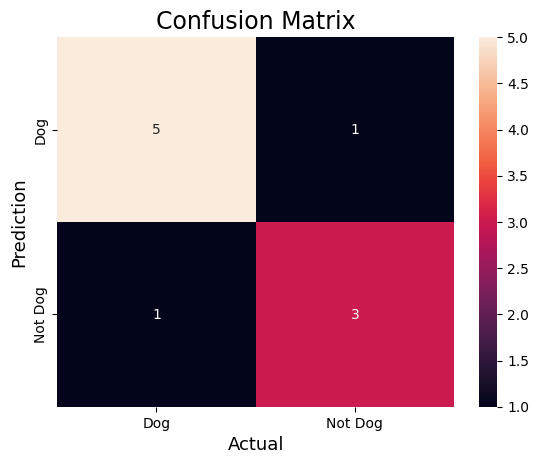

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# now we have to create an actual and predicted numpy arrays.
actual = np.array(['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])

# compute the confusion matrix
cm = confusion_matrix(actual,predicted)

# plot the confusion matrix
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Dog','Not Dog'],yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

accuracy = TP+TN/TP+TN+FP+FN

here accuracy = 8/10 = 0.8

binary classification of breast cancer

In [4]:
# import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# load the breast cancer dataset
x,y = load_breast_cancer(return_X_y=True) # the return_X_y returns two tuples where one is feature data and another one target data.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [5]:
# now we will train the model 
tree = DecisionTreeClassifier(random_state=23)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=23)

In [6]:
# prediction
y_pred = tree.predict(x_test)

In [7]:
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred) # here y_test is the actual data and y_pred is prediction.

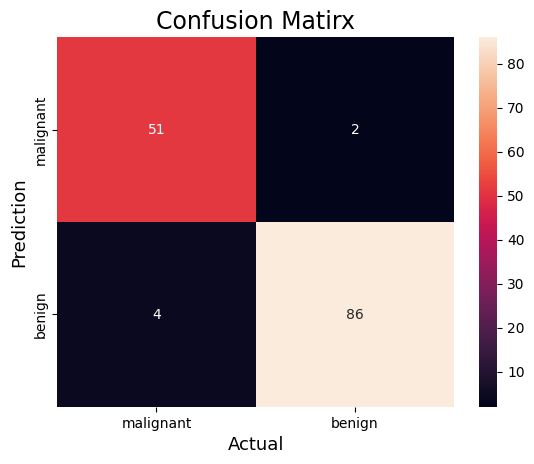

In [8]:
# plot the confusion matrix
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['malignant','benign'],yticklabels=['malignant','benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matirx',fontsize=17)
plt.show()

In [9]:
# finding precision and recall
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
precision = precision_score(y_test,y_pred)
print("Precision: ",precision)
recall = recall_score(y_test,y_pred)
print("Recall: ",recall)
F1_score = f1_score(y_test,y_pred)
print("F1_score: ",F1_score)

Accuracy:  0.958041958041958
Precision:  0.9772727272727273
Recall:  0.9555555555555556
F1_score:  0.9662921348314608


4. Precision - Now what does actually Precision means?
   Actuall it is the ratio of true positives and all positives.
   precision = (true positives)/(true positives+false positives)

5. Recall means that how much our model correctly identifies true positives.
recall = (true positives)/(true positives + false negatives).

6. F1 Score - It is the harmonic mean between precision and recall.
harmonic mean = n/(1/x1+1/x2+1/x3+...+1/x4) --> this gives the rate of the dataset.

7. ROC-AUC graph

ROC graph is between TPR(true positive rate,sensitivity) and FPR(false positive rate,1-specificity).
AUC is the area under the curve ROC in the graph and this actually means that how well the model is able to distinguish between classes.

In [1]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = [1,1,0,0,1,0]
y_pred = [0.95, 0.90, 0.85, 0.81, 0.78, 0.70]
auc = np.round(roc_auc_score(y_true,y_pred),3)
print("AUC for our sample data is {}".format(auc))

AUC for our sample data is 0.778
